<h1> Problema de las N-reinas: implementaciones y acercamientos a algoritmos orientados a la resolución del problema.</h1>
<p><h6 align='center'> Buscamos implementar y contrastar distintos algoritmos que nos permitieran resolver el 
problema de las N-reinas con las restricciones originales del problema, a su vez indagamos en 
las distintas tecnicas de solución que se han propuesto hasta el dia de hoy y como muchos han optado
por algoritmos que satisfacen este problema viendo la aplicabilidad en distintos campos</h6></p>

<p>Los algoritmos implementados en la resolución del problema de las N reinas, fueron los siguientes:</p>
<li> Implementación del algoritmo de sosic y jun gu </li>
<li> Implementación del algoritmo Hill climbing juntos con tres variaciones en busca del minimo conflicto</li>
<li> Implementación del algoritmo backtracking</li>


<h3>Implementación del algoritmo de Sosic y Jun Gu</h3>

<p>A continuación mostramos resultados obtenidos en la ejecución del algoritmo Sosic y Jun Gu variando el numero N de reinas, en esta caso consideraremos, mediremos tiempo que tarda el programa en asignarle una ubicación a las N reinas y tambien revisaremos el consumo de memoria.</p>
<b>Tiempo de ejecución para N reinas:</b>

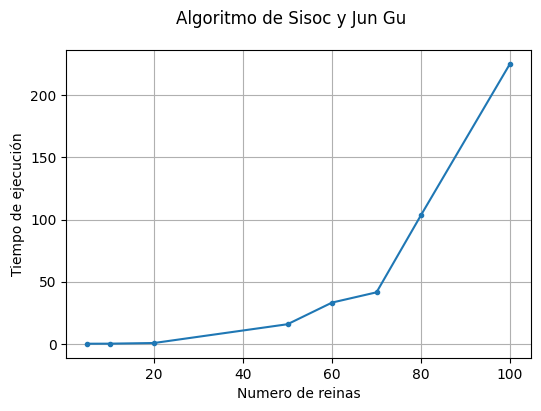

In [3]:
import csv
import matplotlib.pyplot as plt

dataTimeSosicgau = csv.reader(open('AlgorithmTimeData/Sosic_Gu.csv'))
results = [] #primer arreglo indexado corresponde al tiempo y el segundo a a la  salida de tiempo del programa
for row in dataTimeSosicgau:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])
time = [float(results[0][i]) for i in range(1,len(results[0]))]
n_queens = [int(results[1][i]) for i in range(1,len(results[1]))]
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(n_queens,time,marker='.')
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")

plt.suptitle("Algoritmo de Sisoc y Jun Gu")
plt.show()


<b>Consumo de memoria del algoritmo Sosic y Jun Gu variando el numero N de reinas a asignar en el tablero:</b>

In [ ]:
#Consumo para N=5 reinas
#Line     Mem usage    Increment  Occurrences   Line Contents
=============================================================
    60     48.9 MiB     48.9 MiB           1   @profile
    61                                         # given N be the size of the board lets let each row have exactly one queen
    62                                         def queen_search(queen):
    63                                         
    64                                             # initialization 
    65     48.9 MiB      0.0 MiB           1       while conflict_count(queen) != 0:
    66     49.0 MiB      0.0 MiB           1           queen = list(np.random.permutation(np.array(queen)))    # generate a random permunation of queen[1] to queen[n]
    67     49.0 MiB      0.0 MiB           1           collisions = conflict_count(queen)
    68     49.0 MiB      0.0 MiB           1           limit = 0.45*collisions                     #  variable limit is initialized to a certain percentage of the number of collisions, this adjustmente reduced computing cost and increased algorithm efficiency
    69     49.0 MiB      0.0 MiB           1           number_of_attacks = attacked_queens(queen)
    70     49.0 MiB      0.0 MiB           1           loopCount = 0
    71                                         
    72                                                 #searching ways of arranging the N queens
    73     49.0 MiB      0.0 MiB          55           while loopCount < 32*N:      # bound the iterations, it doesn't affect at all the solution for large n
    74     49.0 MiB      0.0 MiB         214               for k in range(0,number_of_attacks):
    75     49.0 MiB      0.0 MiB         161                   i = attack[k]           # idea: find a arrangement so this queen has no conflict
    76     49.0 MiB      0.0 MiB         161                   j = rd.randint(1,N)     # use a random queen for exchange
    77     49.0 MiB      0.0 MiB         203                   while i == j:
    78     49.0 MiB      0.0 MiB          42                       j=rd.randint(1,N)
    79     49.0 MiB      0.0 MiB         161                   if swap_ok(i,j,queen):          
    80     49.0 MiB      0.0 MiB           1                       rta = perform_swap(i,j,collisions,queen) # update the queens array in case the swap is perform
    81     49.0 MiB      0.0 MiB           1                       collisions = rta[0]
    82     49.0 MiB      0.0 MiB           1                       queen = rta[1]
    83     49.0 MiB      0.0 MiB           1                       if collisions == 0:     # END!
    84     49.0 MiB      0.0 MiB           1                           break
    85                                                             if collisions < limit:      # update the variables that change with the swap
    86                                                                 limit = 0.45*collisions 
    87                                                                 number_of_attacks = attacked_queens(queen)
    88     49.0 MiB      0.0 MiB          54               loopCount = loopCount + number_of_attacks 
    89     49.0 MiB      0.0 MiB           1           return queen


#Consumo para N = 10 reinas
#Line     Mem usage    Increment  Occurrences   Line Contents
=============================================================
    60     49.0 MiB     49.0 MiB           1   @profile
    61                                         # given N be the size of the board lets let each row have exactly one queen
    62                                         def queen_search(queen):
    63                                         
    64                                             # initialization 
    65     49.0 MiB      0.0 MiB           1       while conflict_count(queen) != 0:
    66     49.0 MiB      0.0 MiB           1           queen = list(np.random.permutation(np.array(queen)))    # generate a random permunation of queen[1] to queen[n]
    67     49.0 MiB      0.0 MiB           1           collisions = conflict_count(queen)
    68     49.0 MiB      0.0 MiB           1           limit = 0.45*collisions                     #  variable limit is initialized to a certain percentage of the number of collisions, this adjustmente reduced computing cost and increased algorithm efficiency
    69     49.0 MiB      0.0 MiB           1           number_of_attacks = attacked_queens(queen)
    70     49.0 MiB      0.0 MiB           1           loopCount = 0
    71                                         
    72                                                 #searching ways of arranging the N queens
    73     49.0 MiB      0.0 MiB          34           while loopCount < 32*N:      # bound the iterations, it doesn't affect at all the solution for large n
    74     49.0 MiB      0.0 MiB         356               for k in range(0,number_of_attacks):
    75     49.0 MiB      0.0 MiB         323                   i = attack[k]           # idea: find a arrangement so this queen has no conflict
    76     49.0 MiB      0.0 MiB         323                   j = rd.randint(1,N)     # use a random queen for exchange
    77     49.0 MiB      0.0 MiB         356                   while i == j:
    78     49.0 MiB      0.0 MiB          33                       j=rd.randint(1,N)
    79     49.0 MiB      0.0 MiB         323                   if swap_ok(i,j,queen):          
    80     49.0 MiB      0.0 MiB           7                       rta = perform_swap(i,j,collisions,queen) # update the queens array in case the swap is perform
    81     49.0 MiB      0.0 MiB           7                       collisions = rta[0]
    82     49.0 MiB      0.0 MiB           7                       queen = rta[1]
    83     49.0 MiB      0.0 MiB           7                       if collisions == 0:     # END!
    84                                                                 break
    85     49.0 MiB      0.0 MiB           7                       if collisions < limit:      # update the variables that change with the swap
    86     49.0 MiB      0.0 MiB           2                           limit = 0.45*collisions 
    87     49.0 MiB      0.0 MiB           2                           number_of_attacks = attacked_queens(queen)
    88     49.0 MiB      0.0 MiB          33               loopCount = loopCount + number_of_attacks 
    89     49.0 MiB      0.0 MiB           1           return queen

#Consumo para N= 20 reinas
#Line     Mem usage    Increment  Occurrences   Line Contents
=============================================================
    60     49.0 MiB     49.0 MiB           1   @profile
    61                                         # given N be the size of the board lets let each row have exactly one queen
    62                                         def queen_search(queen):
    63                                         
    64                                             # initialization 
    65     49.0 MiB      0.0 MiB           1       while conflict_count(queen) != 0:
    66     49.0 MiB      0.0 MiB           1           queen = list(np.random.permutation(np.array(queen)))    # generate a random permunation of queen[1] to queen[n]
    67     49.0 MiB      0.0 MiB           1           collisions = conflict_count(queen)
    68     49.0 MiB      0.0 MiB           1           limit = 0.45*collisions                     #  variable limit is initialized to a certain percentage of the number of collisions, this adjustmente reduced computing cost and increased algorithm efficiency
    69     49.0 MiB      0.0 MiB           1           number_of_attacks = attacked_queens(queen)
    70     49.0 MiB      0.0 MiB           1           loopCount = 0
    71                                         
    72                                                 #searching ways of arranging the N queens
    73     49.0 MiB      0.0 MiB          35           while loopCount < 32*N:      # bound the iterations, it doesn't affect at all the solution for large n
    74     49.0 MiB      0.0 MiB         677               for k in range(0,number_of_attacks):
    75     49.0 MiB      0.0 MiB         643                   i = attack[k]           # idea: find a arrangement so this queen has no conflict
    76     49.0 MiB      0.0 MiB         643                   j = rd.randint(1,N)     # use a random queen for exchange
    77     49.0 MiB      0.0 MiB         676                   while i == j:
    78     49.0 MiB      0.0 MiB          33                       j=rd.randint(1,N)
    79     49.0 MiB      0.0 MiB         643                   if swap_ok(i,j,queen):          
    80     49.0 MiB      0.0 MiB          10                       rta = perform_swap(i,j,collisions,queen) # update the queens array in case the swap is perform
    81     49.0 MiB      0.0 MiB          10                       collisions = rta[0]
    82     49.0 MiB      0.0 MiB          10                       queen = rta[1]
    83     49.0 MiB      0.0 MiB          10                       if collisions == 0:     # END!
    84                                                                 break
    85     49.0 MiB      0.0 MiB          10                       if collisions < limit:      # update the variables that change with the swap
    86     49.0 MiB      0.0 MiB           3                           limit = 0.45*collisions 
    87     49.0 MiB      0.0 MiB           3                           number_of_attacks = attacked_queens(queen)
    88     49.0 MiB      0.0 MiB          34               loopCount = loopCount + number_of_attacks 
    89     49.0 MiB      0.0 MiB           1           return queen

#Consumo para N=50 reinas
#Line     Mem usage    Increment  Occurrences   Line Contents
=============================================================
    60     49.0 MiB     49.0 MiB           1   @profile
    61                                         # given N be the size of the board lets let each row have exactly one queen
    62                                         def queen_search(queen):
    63                                         
    64                                             # initialization 
    65     49.0 MiB      0.0 MiB           1       while conflict_count(queen) != 0:
    66     49.0 MiB      0.0 MiB           1           queen = list(np.random.permutation(np.array(queen)))    # generate a random permunation of queen[1] to queen[n]
    67     49.0 MiB      0.0 MiB           1           collisions = conflict_count(queen)
    68     49.0 MiB      0.0 MiB           1           limit = 0.45*collisions                     #  variable limit is initialized to a certain percentage of the number of collisions, this adjustmente reduced computing cost and increased algorithm efficiency
    69     49.0 MiB      0.0 MiB           1           number_of_attacks = attacked_queens(queen)
    70     49.0 MiB      0.0 MiB           1           loopCount = 0
    71                                         
    72                                                 #searching ways of arranging the N queens
    73     49.0 MiB    -95.1 MiB          41           while loopCount < 32*N:      # bound the iterations, it doesn't affect at all the solution for large n
    74     49.0 MiB  -3852.4 MiB        1672               for k in range(0,number_of_attacks):
    75     49.0 MiB  -3757.3 MiB        1632                   i = attack[k]           # idea: find a arrangement so this queen has no conflict
    76     49.0 MiB  -3757.3 MiB        1632                   j = rd.randint(1,N)     # use a random queen for exchange
    77     49.0 MiB  -3815.4 MiB        1665                   while i == j:
    78     49.0 MiB    -58.1 MiB          33                       j=rd.randint(1,N)
    79     49.0 MiB  -3765.9 MiB        1632                   if swap_ok(i,j,queen):          
    80     49.0 MiB     -8.6 MiB          21                       rta = perform_swap(i,j,collisions,queen) # update the queens array in case the swap is perform
    81     49.0 MiB     -8.6 MiB          21                       collisions = rta[0]
    82     49.0 MiB     -8.6 MiB          21                       queen = rta[1]
    83     49.0 MiB     -8.6 MiB          21                       if collisions == 0:     # END!
    84                                                                 break
    85     49.0 MiB     -8.6 MiB          21                       if collisions < limit:      # update the variables that change with the swap
    86     49.0 MiB      0.0 MiB           3                           limit = 0.45*collisions 
    87     49.0 MiB      0.0 MiB           3                           number_of_attacks = attacked_queens(queen)
    88     49.0 MiB    -95.1 MiB          40               loopCount = loopCount + number_of_attacks 
    89     40.4 MiB     -8.6 MiB           1           return queen

#Consumo para N=60 reinas
#Line    Mem usage    Increment  Occurrences   Line Contents
=============================================================
    60     48.9 MiB     48.9 MiB           1   @profile
    61                                         # given N be the size of the board lets let each row have exactly one queen
    62                                         def queen_search(queen):
    63                                         
    64                                             # initialization 
    65     48.9 MiB      0.0 MiB           1       while conflict_count(queen) != 0:
    66     49.0 MiB      0.0 MiB           1           queen = list(np.random.permutation(np.array(queen)))    # generate a random permunation of queen[1] to queen[n]
    67     49.0 MiB      0.0 MiB           1           collisions = conflict_count(queen)
    68     49.0 MiB      0.0 MiB           1           limit = 0.45*collisions                     #  variable limit is initialized to a certain percentage of the number of collisions, this adjustmente reduced computing cost and increased algorithm efficiency
    69     49.0 MiB      0.0 MiB           1           number_of_attacks = attacked_queens(queen)
    70     49.0 MiB      0.0 MiB           1           loopCount = 0
    71                                         
    72                                                 #searching ways of arranging the N queens
    73     49.0 MiB   -155.0 MiB          40           while loopCount < 32*N:      # bound the iterations, it doesn't affect at all the solution for large n
    74     49.0 MiB  -7102.2 MiB        1963               for k in range(0,number_of_attacks):
    75     49.0 MiB  -6941.6 MiB        1924                   i = attack[k]           # idea: find a arrangement so this queen has no conflict
    76     49.0 MiB  -6941.6 MiB        1924                   j = rd.randint(1,N)     # use a random queen for exchange
    77     49.0 MiB  -7034.7 MiB        1959                   while i == j:
    78     48.8 MiB    -99.0 MiB          35                       j=rd.randint(1,N)
    79     49.0 MiB  -6975.4 MiB        1924                   if swap_ok(i,j,queen):          
    80     49.0 MiB    -13.6 MiB          33                       rta = perform_swap(i,j,collisions,queen) # update the queens array in case the swap is perform
    81     49.0 MiB    -13.6 MiB          33                       collisions = rta[0]
    82     49.0 MiB    -13.6 MiB          33                       queen = rta[1]
    83     49.0 MiB    -13.6 MiB          33                       if collisions == 0:     # END!
    84                                                                 break
    85     49.0 MiB    -13.6 MiB          33                       if collisions < limit:      # update the variables that change with the swap
    86     48.8 MiB     -5.1 MiB           4                           limit = 0.45*collisions 
    87     48.8 MiB     -4.4 MiB           4                           number_of_attacks = attacked_queens(queen)
    88     48.8 MiB   -161.6 MiB          39               loopCount = loopCount + number_of_attacks 
    89     15.2 MiB    -33.8 MiB           1           return queen

#Consumo para N=70 reinas
#Line     Mem usage    Increment  Occurrences   Line Contents
=============================================================
    60     49.0 MiB     49.0 MiB           1   @profile
    61                                         # given N be the size of the board lets let each row have exactly one queen
    62                                         def queen_search(queen):
    63                                         
    64                                             # initialization 
    65     49.0 MiB      0.0 MiB           1       while conflict_count(queen) != 0:
    66     49.0 MiB      0.0 MiB           1           queen = list(np.random.permutation(np.array(queen)))    # generate a random permunation of queen[1] to queen[n]
    67     49.0 MiB      0.0 MiB           1           collisions = conflict_count(queen)
    68     49.0 MiB      0.0 MiB           1           limit = 0.45*collisions                     #  variable limit is initialized to a certain percentage of the number of collisions, this adjustmente reduced computing cost and increased algorithm efficiency
    69     49.0 MiB      0.0 MiB           1           number_of_attacks = attacked_queens(queen)
    70     49.0 MiB      0.0 MiB           1           loopCount = 0
    71                                         
    72                                                 #searching ways of arranging the N queens
    73     49.0 MiB    -65.8 MiB          41           while loopCount < 32*N:      # bound the iterations, it doesn't affect at all the solution for large n
    74     49.0 MiB  -3617.0 MiB        2304               for k in range(0,number_of_attacks):
    75     49.0 MiB  -3551.3 MiB        2264                   i = attack[k]           # idea: find a arrangement so this queen has no conflict
    76     49.0 MiB  -3551.3 MiB        2264                   j = rd.randint(1,N)     # use a random queen for exchange
    77     49.0 MiB  -3589.8 MiB        2303                   while i == j:
    78     49.0 MiB    -38.5 MiB          39                       j=rd.randint(1,N)
    79     49.0 MiB  -3556.7 MiB        2264                   if swap_ok(i,j,queen):          
    80     49.0 MiB     -6.5 MiB          24                       rta = perform_swap(i,j,collisions,queen) # update the queens array in case the swap is perform
    81     49.0 MiB     -6.5 MiB          24                       collisions = rta[0]
    82     49.0 MiB     -6.5 MiB          24                       queen = rta[1]
    83     49.0 MiB     -6.5 MiB          24                       if collisions == 0:     # END!
    84                                                                 break
    85     49.0 MiB     -6.5 MiB          24                       if collisions < limit:      # update the variables that change with the swap
    86     49.0 MiB     -0.5 MiB           3                           limit = 0.45*collisions 
    87     49.0 MiB     -0.5 MiB           3                           number_of_attacks = attacked_queens(queen)
    88     49.0 MiB    -65.8 MiB          40               loopCount = loopCount + number_of_attacks 
    89     43.6 MiB     -5.4 MiB           1           return queen

#Consumo para N=80 reinas
#Line     Mem usage    Increment  Occurrences   Line Contents
=============================================================
    60     49.0 MiB     49.0 MiB           1   @profile
    61                                         # given N be the size of the board lets let each row have exactly one queen
    62                                         def queen_search(queen):
    63                                         
    64                                             # initialization 
    65     49.0 MiB      0.0 MiB           1       while conflict_count(queen) != 0:
    66     49.0 MiB      0.0 MiB           1           queen = list(np.random.permutation(np.array(queen)))    # generate a random permunation of queen[1] to queen[n]
    67     49.0 MiB      0.0 MiB           1           collisions = conflict_count(queen)
    68     49.0 MiB      0.0 MiB           1           limit = 0.45*collisions                     #  variable limit is initialized to a certain percentage of the number of collisions, this adjustmente reduced computing cost and increased algorithm efficiency
    69     49.0 MiB      0.0 MiB           1           number_of_attacks = attacked_queens(queen)
    70     49.0 MiB      0.0 MiB           1           loopCount = 0
    71                                         
    72                                                 #searching ways of arranging the N queens
    73     49.0 MiB   -618.5 MiB          39           while loopCount < 32*N:      # bound the iterations, it doesn't affect at all the solution for large n
    74     49.0 MiB -41058.0 MiB        2595               for k in range(0,number_of_attacks):
    75     49.0 MiB -40439.5 MiB        2557                   i = attack[k]           # idea: find a arrangement so this queen has no conflict
    76     49.0 MiB -40439.5 MiB        2557                   j = rd.randint(1,N)     # use a random queen for exchange
    77     49.0 MiB -40816.9 MiB        2579                   while i == j:
    78     49.0 MiB   -377.4 MiB          22                       j=rd.randint(1,N)
    79     49.0 MiB -40478.0 MiB        2557                   if swap_ok(i,j,queen):          
    80     49.0 MiB    -18.9 MiB          35                       rta = perform_swap(i,j,collisions,queen) # update the queens array in case the swap is perform
    81     49.0 MiB    -18.9 MiB          35                       collisions = rta[0]
    82     49.0 MiB    -18.9 MiB          35                       queen = rta[1]
    83     49.0 MiB    -18.9 MiB          35                       if collisions == 0:     # END!
    84                                                                 break
    85     49.0 MiB    -18.9 MiB          35                       if collisions < limit:      # update the variables that change with the swap
    86     49.0 MiB     -5.9 MiB           3                           limit = 0.45*collisions 
    87     49.0 MiB     -5.9 MiB           3                           number_of_attacks = attacked_queens(queen)
    88     49.0 MiB   -618.5 MiB          38               loopCount = loopCount + number_of_attacks 
    89     10.6 MiB    -38.4 MiB           1           return queen

#Consumo para N=100 reinas
#Line     Mem usage    Increment  Occurrences   Line Contents
=============================================================
    60     46.6 MiB     46.6 MiB           1   @profile
    61                                         # given N be the size of the board lets let each row have exactly one queen
    62                                         def queen_search(queen):
    63                                         
    64                                             # initialization 
    65     46.3 MiB     -0.3 MiB           1       while conflict_count(queen) != 0:
    66     46.4 MiB      0.0 MiB           1           queen = list(np.random.permutation(np.array(queen)))    # generate a random permunation of queen[1] to queen[n]
    67     45.8 MiB     -0.6 MiB           1           collisions = conflict_count(queen)
    68     45.8 MiB      0.0 MiB           1           limit = 0.45*collisions                     #  variable limit is initialized to a certain percentage of the number of collisions, this adjustmente reduced computing cost and increased algorithm efficiency
    69     45.4 MiB     -0.3 MiB           1           number_of_attacks = attacked_queens(queen)
    70     45.4 MiB      0.0 MiB           1           loopCount = 0
    71                                         
    72                                                 #searching ways of arranging the N queens
    73     45.4 MiB  -1378.5 MiB          39           while loopCount < 32*N:      # bound the iterations, it doesn't affect at all the solution for large n
    74     45.4 MiB -119298.2 MiB        3266               for k in range(0,number_of_attacks):
    75     45.4 MiB -118401.9 MiB        3228                   i = attack[k]           # idea: find a arrangement so this queen has no conflict
    76     45.4 MiB -118401.9 MiB        3228                   j = rd.randint(1,N)     # use a random queen for exchange
    77     45.4 MiB -119323.3 MiB        3252                   while i == j:
    78     45.1 MiB   -929.2 MiB          24                       j=rd.randint(1,N)
    79     45.3 MiB -118443.1 MiB        3228                   if swap_ok(i,j,queen):          
    80     45.2 MiB   -535.9 MiB          47                       rta = perform_swap(i,j,collisions,queen) # update the queens array in case the swap is perform
    81     45.2 MiB   -533.5 MiB          47                       collisions = rta[0]
    82     45.2 MiB   -533.5 MiB          47                       queen = rta[1]
    83     45.2 MiB   -533.5 MiB          47                       if collisions == 0:     # END!
    84                                                                 break
    85     45.2 MiB   -533.5 MiB          47                       if collisions < limit:      # update the variables that change with the swap
    86     45.1 MiB    -77.3 MiB           3                           limit = 0.45*collisions 
    87     45.1 MiB    -77.0 MiB           3                           number_of_attacks = attacked_queens(queen)
    88     45.1 MiB  -1390.8 MiB          38               loopCount = loopCount + number_of_attacks 
    89      4.1 MiB    -41.3 MiB           1           return queen

In [2]:
import pandas as pd

tiempos_ejec = [['','','','','','','','','','','TP:'],[0.0068,0.0073,0.0075,0.0083,0.0075,0.0078,0.0080,0.0071,0.0087,0.0119,0.0081],[0.0543,0.0652,0.0507,0.0523,0.0524,0.0504,0.0617,0.0498,0.0510,0.0649,0.0552],[0.5513,0.5687,0.5205,0.5311,0.5102,0.5191,1.0378,0.5405,0.5246,0.5512,0.5855],[16.4166,15.5497,15.2237,15.5749,15.6378,14.9747,14.6506,14.6884,15.0245,19.3652,15.7106],[30.3789,36.8022,33.6166,33.4303,32.099,32.5657,33.1107,33.5335,33.3450,31.3472,32.5233],[55.3879,54.6672,55.1413,62.3840,59.1726,54.0110,57.4852,57.5426,54.1711,64.8226,57.4785],[120.8846,91.9703,118.2620,99.2757,98.2921,108.1222,93.2932,112.1614,98.9293,94.6908,103.588],[217.3795,218.488,209.2160,211.501,274.0515,239.213,232.6507,282.7064,268.6751,248.6715,232]]
n_reinas = ['N:',5,10,20,50,60,70,80,100]
df = pd.DataFrame()
df[n_reinas[0]] = tiempos_ejec[0]
df[n_reinas[1]] = tiempos_ejec[1]
df[n_reinas[2]] = tiempos_ejec[2]
df[n_reinas[3]] = tiempos_ejec[3]
df[n_reinas[4]] = tiempos_ejec[4]
df[n_reinas[5]] = tiempos_ejec[5]
df[n_reinas[6]] = tiempos_ejec[6]
df[n_reinas[7]] = tiempos_ejec[7]
df[n_reinas[8]] = tiempos_ejec[8]

print(df)

     N:       5      10      20       50       60       70        80       100
0        0.0068  0.0543  0.5513  16.4166  30.3789  55.3879  120.8846  217.3795
1        0.0073  0.0652  0.5687  15.5497  36.8022  54.6672   91.9703  218.4880
2        0.0075  0.0507  0.5205  15.2237  33.6166  55.1413  118.2620  209.2160
3        0.0083  0.0523  0.5311  15.5749  33.4303  62.3840   99.2757  211.5010
4        0.0075  0.0524  0.5102  15.6378  32.0990  59.1726   98.2921  274.0515
5        0.0078  0.0504  0.5191  14.9747  32.5657  54.0110  108.1222  239.2130
6        0.0080  0.0617  1.0378  14.6506  33.1107  57.4852   93.2932  232.6507
7        0.0071  0.0498  0.5405  14.6884  33.5335  57.5426  112.1614  282.7064
8        0.0087  0.0510  0.5246  15.0245  33.3450  54.1711   98.9293  268.6751
9        0.0119  0.0649  0.5512  19.3652  31.3472  64.8226   94.6908  248.6715
10  TP:  0.0081  0.0552  0.5855  15.7106  32.5233  57.4785  103.5880  232.0000


<h3>Implementación del algoritmos Hill Climbing junto con dos variantes</h3>
<h4>Implementación primer version algoritmo Hill Climbing</h4>

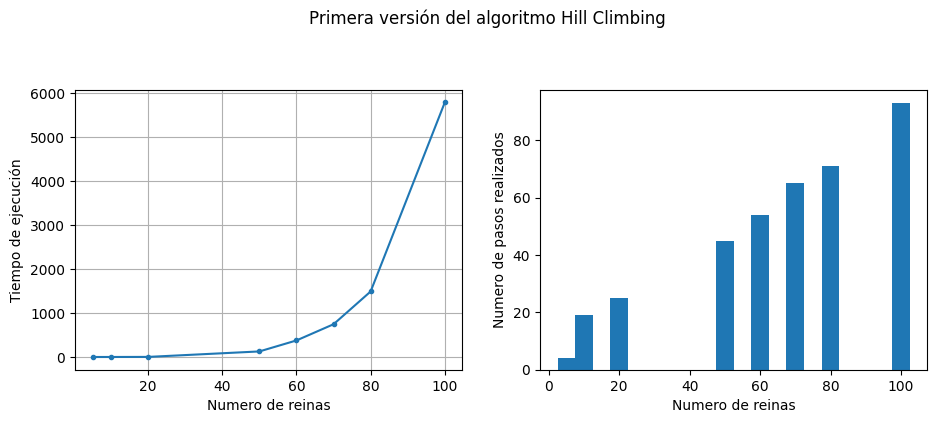

In [13]:
import csv
import matplotlib.pyplot as plt
dataHillClimbing = csv.reader(open('AlgorithmTimeData/HillCimbing.csv'))
results = [] #primer arreglo indexado corresponde al tiempo, el segundo salida de tiempo del programa y tercero el numero de pasos ejecutados
for row in dataHillClimbing:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])
time = [float(results[0][i]) for i in range(1,len(results[0]))]
n_queens = [float(results[1][i]) for i in range(1,len(results[1]))]
steps = [float(results[2][i]) for i in range(1,len(results[2]))]
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
plt.grid()
plt.plot(n_queens,time,marker='.')
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")
plt.subplot(2,2,2)
plt.bar(n_queens,steps,width=5)
plt.ylabel("Numero de pasos realizados")
plt.xlabel("Numero de reinas")
plt.suptitle("Primera versión del algoritmo Hill Climbing")
plt.show()



<h4>Implementacion primera variación algoritmo Hill Climbing</h4>

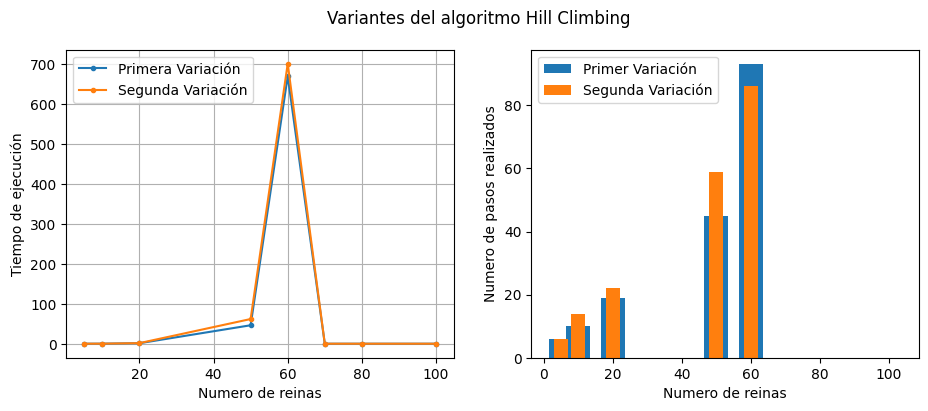

In [8]:
import csv
dataHillClimbing_Variante = csv.reader(open('AlgorithmTimeData/HillClimbing_variantes.csv'))
results = [] 
for row in dataHillClimbing_Variante:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])

n_queens = [int(results[len(results)-1][i]) for i in range(1,len(results[1]))]
time_primeraVer = [float(results[0][i]) for i in range(1,len(results[0]))]
steps_primeraVer = [float(results[1][i]) for i in range(1,len(results[2]))]
time_segundaVer = [float(results[2][i]) for i in range(1,len(results[0]))]
setps_segundaVer = [float(results[3][i]) for i in range(1,len(results[2]))]

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.grid()
plt.plot(n_queens,time_primeraVer,marker='.',label="Primera Variación")
plt.plot(n_queens,time_segundaVer,marker='.',label="Segunda Variación")
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")
plt.legend()

plt.subplot(1,2,2)
plt.bar(n_queens,steps_primeraVer,width=7,label="Primer Variación")
plt.bar(n_queens,setps_segundaVer,width=4,label="Segunda Variación")
plt.ylabel("Numero de pasos realizados")
plt.xlabel("Numero de reinas")
plt.legend()

plt.suptitle("Variantes del algoritmo Hill Climbing")
plt.show()

<h4>Implementacion algoritmo Backstracking</h4>

<p>Mostraremos las estdísticas obtenidas a prtir del uso del algoritmo de BakcTranking basados en tiempo, el número de reinas, y la memoria usada </p>

<b>n = 4</b><br>
[1, 3, 0, 2]<br>
[2, 0, 3, 1]<br>
<b>n= 5</b><br>
[0, 2, 4, 1, 3]<br>
[0, 3, 1, 4, 2]<br>
[1, 3, 0, 2, 4]<br>
[1, 4, 2, 0, 3]<br>
[2, 0, 3, 1, 4]<br>
[2, 4, 1, 3, 0]<br>
[3, 0, 2, 4, 1]<br>
[3, 1, 4, 2, 0]<br>
[4, 1, 3, 0, 2]<br>
[4, 2, 0, 3, 1]<br>

<h4>Implementacion algoritmo de Búsqueda de Costo Uniforme</h4>

n=4
A*: [1, 3, 0, 2]
Uniform-Cost: [2, 0, 3, 1]
n=5
A*: [4, 1, 3, 0, 2]
Uniform-Cost: [0, 3, 1, 4, 2]
n=8
A*: [7, 1, 3, 0, 6, 4, 2, 5]
Uniform-Cost: [1, 6, 4, 7, 0, 3, 5, 2]
